## Loss

To train a model we tweak the weights and biases to improve the models accuracy. To do this we calculate how much loss there is using a **loss** or **cost** function. This quantifies how wrong the model is. Since loss is the models error, we want this to be as close to 0 as possible.

## Categorical Cross-Entropy Loss

Neural networks that do regression use the **mean squared error** loss function.

Neural networks that do classifying use the **categorical cross-entropy** loss function. It is explicitly used to compare ground truth probability distribution (y) and some predicted distribution (y-hat).

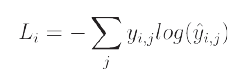

Where:
- $L_i$: sample loss value
- *i*: the ith sample in the set
- *j*: the label/output index
- *y*: the target values
- $\hat{y}$: the predicted values

This can be simplified to:

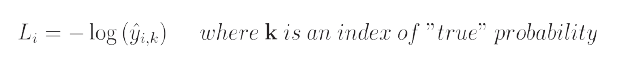


In [10]:
import math

softmax_output = [0.7, 0.1, 0.2]

# arrays like this are called one-hot: one value is on, the rest off
# we use [1, 0, 0] because the expected probablity for the correct value is 1
target_output = [1, 0, 0]

loss = -(math.log(softmax_output[0]) * target_output[0] +
         math.log(softmax_output[1]) * target_output[1] +
         math.log(softmax_output[2]) * target_output[2])
print(loss)

0.35667494393873245


In [11]:
# we can make some assumptions because of the one-hot nature of the target_output
loss = -math.log(softmax_output[0])
print(loss)

0.35667494393873245


In [12]:
# as the confidence value decreases, the loss value increases
print(-math.log(1))
print(-math.log(0.8))
print(-math.log(0.6))
print(-math.log(0.4))
print(-math.log(0.2))
print(-math.log(0.01))

-0.0
0.2231435513142097
0.5108256237659907
0.916290731874155
1.6094379124341003
4.605170185988091


### logs

**logarithm** is defined as the solution for the x-term in an equation of the form $a^x = b$. When the base of a logarithm is $e$ then it is called a **natural log** ($log(x) = log_e(x) = ln(x)$)

$log(0)$ is undefined; there is no x that satifies $e^x = 0$ since e to the power of anything is always a positive number

### Batching loss

In [13]:
# lets say we are trying to classify something as dog (idx 0), cat (idx 1), or human (idx 2)
softmax_outputs = [
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08],
]

# batch is being mapped to dog, cat, cat
class_targets = [0, 1, 1]

for tgt_idx, dist in zip(class_targets, softmax_outputs):
    print(dist[tgt_idx])

0.7
0.5
0.9


In [14]:
# simplified with numpy
import numpy as np

softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08],
])
print(softmax_outputs[[0, 1, 2], class_targets])

[0.7 0.5 0.9]


In [15]:
# compute the loss
neg_loss = -np.log(softmax_outputs[[0, 1, 2], class_targets])
print(neg_loss)

[0.35667494 0.69314718 0.10536052]


In [16]:
# compute the average loss on the batch to see how the model is doing during training
avg_loss = np.mean(neg_loss)
print(avg_loss)

0.38506088005216804


In [17]:
# if targets are a single dimension, they are sparse
# if they are 2 dimension, they are one-hot encoded
class_targets = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
])

if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[range(len(softmax_ouptputs)), class_targets]
elif len(class_targets.shape) == 2:
    # perform matrix multiplacation to get the correct confidence scores from the outputs
    # sum the rows to get the final value
    combined = softmax_outputs * class_targets
    print(combined)
    correct_confidences = np.sum(combined, axis=1)
    
neg_loss = -np.log(correct_confidences)
avg_loss = np.mean(neg_loss)
print(avg_loss)

[[0.7 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.9 0. ]]
0.38506088005216804


In [18]:
from loss import CategoricalCrossEntropy

loss_function = CategoricalCrossEntropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


## Accuracy

**accuracy** is a commonly used metric in practice along with loss and defines how often the largest confidence is the correct class in terms of a fraction.

In [19]:
softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.5, 0.1, 0.4], # this is a wrong predicition
    [0.02, 0.9, 0.08],
])
class_targets = np.array([0, 1, 1])

# get the argmax of the outputs (each row)
predictions = np.argmax(softmax_outputs, axis=1)

# if the targets are one-hot encoded convert them
if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
    
# compute the mean of when the predictions are equal to the classes
accuracy = np.mean(predictions == class_targets)

print(accuracy)

0.6666666666666666
